In [1]:
%matplotlib inline

In [4]:
from matplotlib.pylab import *
# style.use("style_sheet.mplstyle")

rc('figure', figsize=(6, 4))
rc('savefig', bbox='tight')
plt.rcParams.update({'font.size': 18})

In [8]:
import torch
import numpy as np
from models import resnet18_narrow
import glob
from args import get_args

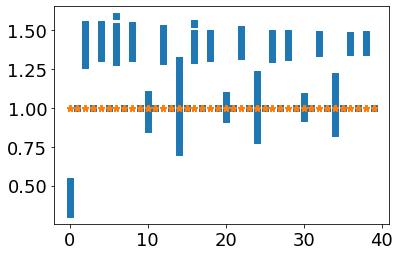

In [12]:
args = get_args(["--exp_num", "0", "--dtype", "cifar10"])

# ResNet18
fig, ax = plt.subplots()

params = {}
norms = [[],[]]
model = resnet18_narrow(args)

for n, p in model.named_parameters():
    new_n = ''.join(n.split('.')[:-1])
    if new_n not in params.keys():
        params[new_n] = [p]
    else:
        params[new_n].append(p)

for i,item in enumerate(params.items()):
    k,v = item
    if len(v) == 1:
        s = v[0].shape[0]
        norms[0] += [i]*s 
        norms[1] += list((v[0].data.view(s,-1).norm(dim=1)).numpy())
    elif len(v) == 2:
        if k == 'linear':
            continue
        else:
            s = v[0].shape[0]
            norms[0] += [i]*s
            norms[1] += list((v[0].data.abs() + v[1].data.abs()).numpy())
    else:
        print(f"Problem in {k}")

params = {}
re_norms = [[],[]]
model = resnet18_narrow(args)
model.norm()
for n, p in model.named_parameters():
    new_n = ''.join(n.split('.')[:-1])
    if new_n not in params.keys():
        params[new_n] = [p]
    else:
        params[new_n].append(p)

for i,item in enumerate(params.items()):
    k,v = item
    if len(v) == 1:
        s = v[0].shape[0]
        re_norms[0] += [i]*s 
        re_norms[1] += list((v[0].data.view(s,-1).norm(dim=1)).numpy())
    elif len(v) == 2:
        if k == 'linear':
            continue
        else:
            s = v[0].shape[0]
            re_norms[0] += [i]*s
            re_norms[1] += list((v[0].data.abs() + v[1].data.abs()).numpy())
    else:
        print(f"Problem in {k}")
        
ax.scatter(norms[0], norms[1], marker='s')
ax.scatter(re_norms[0], re_norms[1], marker='*')
# ax.set_xlabel("Layer number")
# ax.set_ylabel("Layer norm")
# ax.set_title("Norm of filters at each layer")
# ax.legend(["original model", "normalized model"], fancybox=True, shadow=True, frameon=True, loc=0,handletextpad=0.1)
# plt.savefig("resnet.png")